# To Begin

This is a practical part of your ASR-TTS course. In total you will have 5 labs. Three of which will be focused on Automatic Speech Recognition and two on Text-to-Speech models. Each lab will last two hours and consist of two parts:
* Reading Part
* Coding Part 

In each part you might find question or tasks/activities to complete. The grading of the labs is explained below.

# What will you learn in LAB 1?

* What "building blocks" make up an ASR system and what is each block responsible for?
* What are the steps/ways to pre-process audio files?
* What is speechbrain/huggings and how to use it.
* What metrics are used to evaluate ASR systems and how to code them.
* How does the size of the model influence the results.

# Reading Part

The following part will introduce some basic concepts necessary in order to successfully complete the labs in this module. Please go through it carefully and visit all the sites provided. Some parts may contain questions for you to think about and/or answer **before** starting this lab.

## ASR Systems 

Today, there are two main approaches to Automatic Speech Recognition:

* Traditional Hybrid Approach: Uses separate lexicon, acoustic, and language models working together‍
* End-to-End AI Approach: Employs a single unified model that directly maps audio to text

## Traditional Hybrid Approach

The traditional hybrid approach is the legacy approach to speech recognition and dominated the field for the past fifteen years. Many companies still rely on this approach simply because it's the way it has always been done—there's extensive research and training data available, despite plateaus in accuracy.

Here's how the traditional approach works:

(Traditional Hidden Markov Model (HMM) and Gaussian Mixture Model (GMM) systems)

<center><a href="https://cdn.prod.website-files.com/67a1e6de2f2eab2e125f8b9a/67a4ef64ea5a7aecc7fbfff1_Ob6V9bDqghzL32kRQRSSqs0swjKiQuOYiYxZzChVLqbJQRki0PM0ucZiNQnZw1X8uM9IfWdQBQxF33lX0NN_xqkUetxJsSCio6vqo8mKbQ_9-Q1FN-zVL-mdtMsXh6RPSJhHhhZu.png">
    <img src="https://cdn.prod.website-files.com/67a1e6de2f2eab2e125f8b9a/67a4ef64ea5a7aecc7fbfff1_Ob6V9bDqghzL32kRQRSSqs0swjKiQuOYiYxZzChVLqbJQRki0PM0ucZiNQnZw1X8uM9IfWdQBQxF33lX0NN_xqkUetxJsSCio6vqo8mKbQ_9-Q1FN-zVL-mdtMsXh6RPSJhHhhZu.png" width="600"></a></center>

Traditional HMM and GMM require forced aligned data. Force alignment determines where in time particular words occur in an audio segment.

This approach combines three separate models:

* Lexicon Model: Describes phonetic pronunciation of words
* Acoustic Model: Predicts phonemes from audio segments
* Language Model: Predicts word sequences and probabilities


* Lexicon Model

The lexicon model describes how words are pronounced phonetically. You need a custom phoneme set for each language, handcrafted by expert phoneticians.

* Acoustic Model

The acoustic model (AM) models the acoustic patterns of speech. The job of the acoustic model is to predict which sound or phoneme is being spoken at each speech segment from the forced aligned data. 

* Language Model

The language model (LM) models the statistics of language. It learns which sequences of words are most likely to be spoken, and its job is to predict which words will follow on from the current words and with what probability.

* Decoding

Decoding is a process of utilizing the lexicon, acoustic, and language models to produce a transcript.





 

## Downsides of the Traditional Approach

Though still widely used, the traditional hybrid approach to speech recognition has several drawbacks. Lower accuracy is the biggest challenge. Each model must be trained independently, making them time and labor intensive.

Forced aligned data is difficult to come by and requires significant human labor. Experts are needed to build custom phonetic sets to boost the model's accuracy.

## How End-to-End AI Models Work
With an end-to-end system, you can directly map a sequence of input acoustic features into a sequence of words. The data doesn't need to be force-aligned. Depending on the architecture, an AI system can be trained to produce accurate transcripts without a lexicon model and language model, although language models can help produce more accurate results.

* Modern Architectures: CTC, LAS, and RNNTs

CTC, LAS, and RNNTs are popular speech recognition end-to-end AI architectures. These systems can be trained to produce highly accurate results without needing force aligned data, lexicon models, and language models.



## Advantages of end-to-end AI Models
End-to-end AI models are easier to train and require less human labor than a traditional approach. They're also often more accurate.


## ASR Pipeline


1. **Feature extraction**: The audio waveform is preprocessed into normalized features such as spectrogram or MFCCs. 
2. **Acoustic model**: The features are transformed into high-dimensional embeddings via a deep neural network (here: [wav2vec2](https://arxiv.org/pdf/2006.11477)), and then a classifier is applied to predict the class of each token (=character) at each time step. 
3. **Decoding**: A transcript is generated from the sequence of class probabilities, either using a language model or not. 

<center><a href="https://developer.nvidia.com/blog/how-to-build-domain-specific-automatic-speech-recognition-models-on-gpus/"> <img src="https://developer-blogs.nvidia.com/wp-content/uploads/2019/12/ASR-Pipeline-1.png" width="600"></a></center> 

In this lab, we experiment with ASR using pretrained acoustic models (which include feature extraction for simplicity). We provide a dataset of real-life speech audio (with trancription) in order to study the influence of several factors onto the performance of a modern ASR system. We focus on the usage of the acoustic model, thus we use a simple decoder with no language model (this will be the topic of the next lab). This series of lab relies on [torchaudio](https://pytorch.org/audio/stable/index.html), which is a pytorch-based librairy for audio/signal processing. More specifically, this lab is based on this [tutorial](https://pytorch.org/audio/stable/tutorials/speech_recognition_pipeline_tutorial.html#sphx-glr-tutorials-speech-recognition-pipeline-tutorial-py), which you are encouraged to check.

## Question:

Read the following and explain how feature extraction works: 
https://developer.nvidia.com/blog/essential-guide-to-automatic-speech-recognition-technology/
https://medium.com/data-science/audio-deep-learning-made-simple-automatic-speech-recognition-asr-how-it-works-716cfce4c706


In [ ]:
# Final Goal: convert audio signal of speech to text.

# Feature extraction: convertation of raw audio to spectrograms that can be utilized for prediction and training

# Coding Activities

## Run your first ASR model

The following is an example of the CRDNN Commonvoice model that can be found here:

* https://huggingface.co/speechbrain/asr-crdnn-commonvoice-fr

Run the model and obtain a transcription of one audio file.

In [ ]:
# import torchaudio

# if not hasattr(torchaudio, "list_audio_backends"):
#     torchaudio.list_audio_backends = lambda: [""]  # type: ignore

In [2]:
from speechbrain.inference.ASR import EncoderDecoderASR
import torch

In [10]:


device = torch.device("cpu")
torch.device("cpu") 
#Question: what is your model path and how to know it? Hint: have a look at the speechbrain documentation
trial_path = "../../asr-dataset/speech/61-70970-0005.wav"

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-commonvoice-fr", 
                                           savedir="pretrained_models/asr-crdnn-commonvoice-fr",
                                           run_opts={"device": device})
asr_model.transcribe_file(trial_path)


/home/tacit/ASR/ASR-TTS-Course/.sbrain/lib/python3.10/site-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


asr.ckpt:   0%|          | 0.00/593M [00:00<?, ?B/s]

tokenizer.ckpt:   0%|          | 0.00/245k [00:00<?, ?B/s]

/home/tacit/ASR/ASR-TTS-Course/.sbrain/lib/python3.10/site-packages/speechbrain/processing/features.py:1529: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  stats = torch.load

'THOMAS DE JACKTON MAL'

## Question:

Is transcription correct? Why?

In [ ]:


# Target: THE LAD HAD CHECKED HIM THEN
# result: 'THOMAS DE JACKTON MAL'

#it most likely due to the fact that your suggested model is for French and the speech is in English

## Explore Huggingface

Use the search tool to find a more suitable ASR model and run below on one file. Compare your output with the transcription. Is it better?

In [7]:
%ls ../..

README.md                   STEP2_Do_Your_Labs/  requirements.txt
STEP1_Setup_Your_Computer/  asr-dataset/


In [9]:
## Your code here
from transformers import WhisperProcessor, WhisperForConditionalGeneration
import soundfile as sf

device = torch.device("cpu")

processor = WhisperProcessor.from_pretrained("openai/whisper-tiny.en")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-tiny.en").to(device)
trial_path = "../../asr-dataset/speech/61-70970-0005.wav"
speech, sr = sf.read(trial_path)
inputs = processor(speech, sampling_rate=sr, return_tensors="pt").input_features.to(device)

pred_ids = model.generate(inputs)
transcription = processor.batch_decode(pred_ids, skip_special_tokens=True)
print(transcription[0])


Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


 The latter checked him then.


In [ ]:
# not too bad!

# "The latter" instead of "The lad had" maybe due to pronunciation, namely h-dropping or linkingg d and a

#

Help for the task below: https://www.geeksforgeeks.org/python/how-to-iterate-over-files-in-directory-using-python/

In [ ]:
## Space to run the model iterating over 10 audio files

MAX_FILES = 10

## ASR step-by-step

In [12]:
import torch
import torchaudio
import IPython
import os
import fnmatch
import matplotlib.pyplot as plt
torch.random.manual_seed(0);

MAX_FILES = 100 # lower this number for processing a subset of the dataset

In [3]:
# Main dataset path - If needed, you can change it HERE but NOWHERE ELSE in the notebook!
data_dir = "../../asr-dataset/"

In [4]:
# Speech and transcripts sub-directories paths
data_speech_dir = os.path.join(data_dir, 'speech')
data_transc_dir = os.path.join(data_dir, 'transcription')

## Load and display an audio example

Let us first load an audio file, listen to it using an audio reader, and plot the waveform.

In [11]:
ls ../..

README.md                   STEP2_Do_Your_Labs/  requirements.txt
STEP1_Setup_Your_Computer/  asr-dataset/


In [8]:
# Example file
audio_file = '61-70968-0001.wav'
audio_file_path = os.path.join(data_speech_dir, audio_file)
print(f"Audio file path: {audio_file_path}")

waveform, sr = torchaudio.load(audio_file_path, channels_first=True)
IPython.display.Audio(data=waveform, rate=sr)

Audio file path: ../../asr-dataset/speech/61-70968-0001.wav


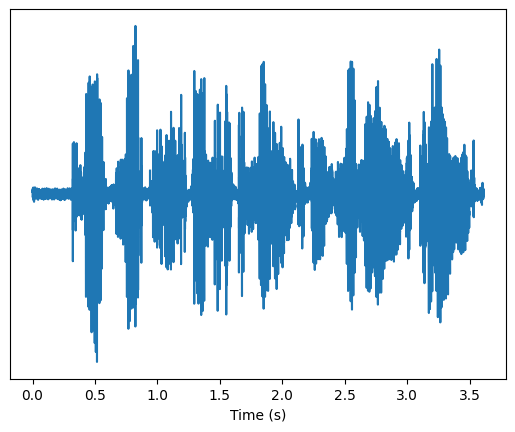

In [15]:
# Plot the speech signal waveform
plt.figure()
xt = torch.arange(waveform.size(1)) / sr
plt.plot(xt, waveform.T)
plt.yticks([])
plt.xlabel("Time (s)")
plt.show()

## Acoustic model

Let us create an acoustic model that performs feature extraction and classification. In this lab, we use [wav2vec2](https://arxiv.org/pdf/2006.11477), a self-supervised audio model that produces state-of-the-art results for many audio tasks (including ASR).

For convenience, both the model definition and pretrained wav2vec2 weights can be directly loaded using torchaudio, which includes two types of weights:
- The pretrained weights [without fine-tuning](https://pytorch.org/audio/stable/pipelines.html#id3), that can be fine-tuned for any other downstream tasks (e.g., emotion recognition or language detection).
- The pretrained weights that are [fine-tuned for the ASR task](https://pytorch.org/audio/stable/pipelines.html#id36), using an extra classification layer after feature extraction with wav2vec2.

In this series of lab, we use the latter. Below we provide the code for constructing a model and fetching the pretrained weights along with the classification labels. Here we use the `WAV2VEC2_ASR_BASE_100H` model. As the name indicates, it is a basic wav2vec2 architecture that is fine-tuned for ASR using 100 hours of the Librispeech dataset (containing both speech and transcriptions). Other models can be fetched using torchaudio (see the list [here](https://pytorch.org/audio/stable/pipelines.html#id36)).

In [16]:
# Load the acoustic model
model_name = 'WAV2VEC2_ASR_BASE_100H'
bundle = getattr(torchaudio.pipelines, model_name)
acoustic_model = bundle.get_model()

Downloading: "https://download.pytorch.org/torchaudio/models/wav2vec2_fairseq_base_ls960_asr_ls100.pth" to /home/tacit/.cache/torch/hub/checkpoints/wav2vec2_fairseq_base_ls960_asr_ls100.pth
100%|██████████| 360M/360M [09:48<00:00, 641kB/s]     


In [48]:
device = torch.device("cpu")

# Load model from torchaudio (it will use the cached .pth file)
bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_100H
acoustic_model = bundle.get_model().to(device)

In [14]:
%ls ~/.cache/torch/hub/checkpoints/


wav2vec2_fairseq_base_ls960_asr_ls100.pth


## Question:

What other models could you potentially use in model_name = " "?

In [ ]:
## WAV2VEC2_ASR_BASE_960H
## RNNTBundle
## MMS_FA
## Tacotron2TTS

In [49]:
# Display the details of the model's architecture (more info on this in the Neural Network labs!)
print(acoustic_model)

Wav2Vec2Model(
  (feature_extractor): FeatureExtractor(
    (conv_layers): ModuleList(
      (0): ConvLayerBlock(
        (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
      )
      (1-4): 4 x ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
      )
      (5-6): 2 x ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
      )
    )
  )
  (encoder): Encoder(
    (feature_projection): FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (pos_conv_embed): ConvolutionalPositionalEmbedding(
        (conv): ParametrizedConv1d(
          768, 768, kernel_size=(128,), stride=(1,), padding=(64,), groups=16
          (parametriza

In [50]:
# Get and display the classification labels
labels = bundle.get_labels()
print('Labels:', labels)

Labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


The labels are the characters that can be predicted by the acoustic model. Note that there are two special labels:
- `-` is the blank label, which corresponds to no character.
- `|` is the end-of-word label, which is useful to further segment a list of characters into a sequence of words.

We can now apply the acoustic model to the example audio signal wa have loaded above. We can either compute the acoustic features or predicting the labels after the classification layer (also called the *emission* matrix/tensor):
- `features` is a list of tensors, where each tensor is the output of a transformer layer from the wav2vec2 model.

In [51]:
with torch.inference_mode():
    features, _ = acoustic_model.extract_features(waveform)

print(f"Number of transformer layers: {len(features)}")
print(features[0].shape)

Number of transformer layers: 12
torch.Size([1, 180, 768])


- `emission` is a tensor of size `[1, time steps, number of classes]` corresponding to the output of the classification layer (`1` corresponds to the batch size). Note that it is in the form of logits, not probabilities (thus it is not normalized in $[0, 1]$).

In [52]:
with torch.inference_mode():
    emission, _ = acoustic_model(waveform)

print(emission.shape)

torch.Size([1, 180, 29])


## Question:

Why are there 29 classes?

In [ ]:
## Answer here

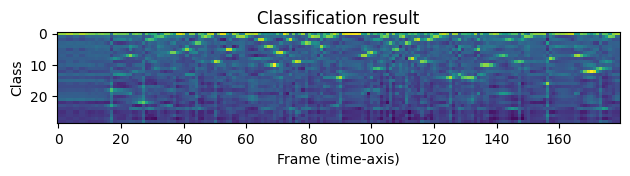

In [53]:
# Vizualize the result of the classification
plt.figure()
plt.imshow(emission[0].cpu().T)
plt.title("Classification result")
plt.xlabel("Frame (time-axis)")
plt.ylabel("Class")
plt.tight_layout()
plt.show()

We can compute the most likely label at each time frame to get a first rough transcript estimate, as done below.

In [24]:
indices = torch.argmax(emission[0], dim=-1)  # take the most likely index at each time step
pred_labels = [labels[i] for i in indices] # transform each index into the corresponding label
print(pred_labels)

['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'G', '-', '-', '-', '-', '-', 'I', '-', '-', '-', 'V', '-', 'E', 'E', '-', '|', '|', '-', '-', 'N', 'N', '-', '-', '-', 'O', '-', '-', 'T', '-', '|', '|', '-', '-', 'S', '-', '-', '-', 'O', 'O', '-', '|', '|', '|', '-', '-', '-', '-', 'E', 'E', 'A', 'A', 'A', 'R', 'N', 'N', '-', '-', 'E', '-', 'S', 'S', '-', 'T', 'T', '|', '|', '|', 'A', '-', '|', '|', '-', '-', 'M', '-', '-', '-', '-', '-', '-', 'I', 'I', '-', 'N', '-', 'D', '-', '|', '-', 'T', '-', 'O', '|', '|', 'T', 'H', 'H', 'E', 'E', 'S', 'S', 'E', 'E', '|', '|', '-', '-', '-', 'M', '-', '-', 'U', 'M', 'M', 'M', 'M', '-', 'O', 'R', 'R', 'R', '-', '-', '-', 'I', 'I', 'E', 'E', '-', '-', 'S', '-', '|', '|', '-', '-', '-', '-', '-', 'C', 'H', '-', '-', '-', '-', '-', '-', '-', 'I', 'I', '-', 'L', 'L', 'L', 'L', '-', 'D', '-', '-', '|', '-', '-', '-']


Note that there are many blank labels `'-'`, as well as duplicates. This is why some further postprocessing / decoding is needed.

## Decoding

From the emission tensor, which is the sequence of probabilities (or logits) for each class / token, we now want to generate a transcript (or *hypothesis*). This process is called *decoding*. Decoding can be complex because it implies accounting for the context in order to avoid duplicates, assembling characters into words, identifying precise word start / end, and building sequences of words that make sense given some underlying language model.

Such refined decoding techniques involve using external ressources such as lexicon and language models. In this lab however, we rely on a naive approach called a *greedy* decoder, which does not depend on such components. The context information is not used (= we pick the best hypothesis at each time step), and only one transcript is generated by applying some basic post-processing (removing blank tokens and duplicates).

In [18]:
class GreedyDecoder(torch.nn.Module):
    def __init__(self, labels, blank_token_indx=0):
        super().__init__()
        self.labels = labels
        self.blank_token_indx = blank_token_indx

    def forward(self, emission):
        """Given a sequence emission over labels, decode the transcript
        Args:
          emission (Tensor): Logit tensors. Shape `[1, num_seq, num_label]`.
        Returns:
          transcript (List of strings): The resulting transcript
        """
        emission = emission[0] # take the first element in the batch (only one)
        indices = torch.argmax(emission, dim=-1)  # take the most likely index at each time step
        indices = torch.unique_consecutive(indices, dim=-1) # remove duplicates
        indices = [i for i in indices if i != self.blank_token_indx] # remove blank token
        transcript = "".join([self.labels[i] for i in indices]) # convert indices into tokens
        transcript = transcript.replace("|", " ").lower().split() # a bit of post-processing
        return transcript

In [54]:
# Instanciate the decoder, apply it, and display the result
decoder = GreedyDecoder(labels=labels)
est_transcript = decoder(emission)
print(est_transcript)

['give', 'not', 'so', 'earnest', 'a', 'mind', 'to', 'these', 'mumories', 'child']


## Evaluation

To evaluate the quality of the transcript above, we compare the estimated transcript produced by the ASR system to a **reference (ground-truth) transcript**.

A standard metric for this task is the **Word Error Rate (WER)**, which measures speech recognition performance as a percentage (lower is better).

WER is based on the **Levenshtein distance**, which counts the minimum number of edit operations required to transform the estimated transcript into the reference transcript. This allows the comparison of sequences with different lengths.

The allowed edit operations are:
- **Substitution (S)**: one word is replaced by another  
- **Deletion (D)**: a word is missing in the estimated transcript  
- **Insertion (I)**: an extra word is added in the estimated transcript  

### WER definition

The Word Error Rate is defined as:

$$
\mathrm{WER} = \frac{S + D + I}{N}
$$

where:
- $S$ is the number of substitutions  
- $D$ is the number of deletions  
- $I$ is the number of insertions  
- $N$ is the total number of words in the reference transcript  

The result is typically expressed as a **percentage**.

### Preprocessing

Before computing the WER, both the reference and estimated transcripts must be **preprocessed in the same way**, for example by:
- converting all text to lowercase
- splitting the text into words

This ensures that differences in formatting (e.g. capitalization) do not artificially increase the error rate.



In [23]:
def get_wer(true_transcript, est_transcript):
    wer = torchaudio.functional.edit_distance(true_transcript, est_transcript) / len(true_transcript)
    return wer

In [28]:
def get_true_transcript(transc_file_path):
    with open(transc_file_path, "r") as f:
        true_transcript = f.read()
    true_transcript = true_transcript.lower().split()
    return true_transcript
    
# Load and display the true transcription
transc_file_path = os.path.join(data_transc_dir, audio_file.replace('wav', 'txt'))
true_transcript = get_true_transcript(transc_file_path)
print(true_transcript)

['give', 'not', 'so', 'earnest', 'a', 'mind', 'to', 'these', 'mummeries', 'child']


In [29]:
# Compute and display the WER score
wer = get_wer(true_transcript, est_transcript)
print(f"WER: {wer*100:.1f} %")

WER: 10.0 %


## Question:
The example above is not the only way to calculate WER. Use google to find another python library for WER calculation, transcribe the one file and use the library to calculate WER. 

Don't forget to pip install it!

In [58]:
# %pip install jiwer

In [56]:
# true_transcript, est_transcript

In [57]:
import jiwer
error_rate = jiwer.wer(" ".join(true_transcript), " ".join(est_transcript))

print(f"WER: {error_rate * 100:.1f} %")

WER: 10.0 %


## Process a folder

<span style="color:red"> **Exercise 2**</span>. Process the entire dataset folder (=the 100 files) using the wav2vec2 acoustic model and the greedy decoder above, and compute and display the mean WER over the dataset.

In [24]:
# We provide a function below that returns the list of all files in a directory
def find_files(directory, pattern='*.wav'):
    """Recursively finds all files matching the pattern."""
    files = []
    for root, _, filenames in os.walk(directory):
        for filename in fnmatch.filter(filenames, pattern):
            files.append(filename)
    files = sorted(files)
    return files

# Get the list of audio files in the asr dataset
audio_files = find_files(data_speech_dir)
print(audio_files[:10])

['121-121726-0002.wav', '121-121726-0004.wav', '121-121726-0005.wav', '121-121726-0006.wav', '121-121726-0008.wav', '121-121726-0011.wav', '121-121726-0012.wav', '121-121726-0013.wav', '121-121726-0014.wav', '121-123852-0001.wav']


In [25]:
# Function to process a folder
def process_folder(data_speech_dir, data_transc_dir, acoustic_model, decoder, verbose=True, max_files=None):

    # Get the list of files in the dataset folder
    audio_files = find_files(data_speech_dir)

    # Take a subset of files
    nfiles = len(audio_files)
    if max_files:
        nfiles = min(nfiles, max_files)
    audio_files = audio_files[:nfiles]

    # Initialize lists containing true and estimated transcripts, as well as WER
    true_transcript_all = []
    est_transcript_all = []
    wer_all = []

    for iaf, audio_file in enumerate(audio_files):
        
        # Get files path (speech and transcript)
        audio_file_path = os.path.join(data_speech_dir, audio_file)
        transc_file_path = os.path.join(data_transc_dir, audio_file.replace('wav', 'txt'))

        # Load an audio signal
        waveform, sr = torchaudio.load(audio_file_path, channels_first=True)

        # Apply acoustic model and decoder
        with torch.inference_mode():
            emission, _ = acoustic_model(waveform)
            est_transcript = decoder(emission)
            
        # Load the true transcription
        true_transcript = get_true_transcript(transc_file_path)
        
        # Compute WER
        wer = get_wer(true_transcript, est_transcript)
        wer_all.append(wer)

        est_transcript_all.append(est_transcript)
        true_transcript_all.append(true_transcript)
        
        # Display results
        if verbose:
            print(f"File {iaf+1} / {nfiles}")
            print('Estimated transcript: ', est_transcript)
            print('True transcript: ', true_transcript)
            print(f"WER: {wer*100} %")

    wer_mean = torch.FloatTensor(wer_all).mean()

    return wer_mean, est_transcript_all, true_transcript_all

In [32]:
# Process the dataset and display the mean WER
wer_mean, _, _ = process_folder(data_speech_dir, data_transc_dir, acoustic_model, decoder, verbose=False, max_files=MAX_FILES)
print(f"Mean WER: {wer_mean*100:.1f} %")

Mean WER: 9.5 %


## Influence of the noise


### Signal-to-Noise Ratio (SNR)

Automatic Speech Recognition (ASR) systems are expected to be sensitive to noise:  
while a model might work well on a clean recording, its performance typically drops in real-life conditions where speech is contaminated with background noise.

To simulate such conditions, we add **white noise** to clean speech waveforms at controlled noise levels.

The amount of noise is quantified using the **signal-to-noise ratio (SNR)**, expressed in decibels (dB).

- **High SNR** → speech dominates → easier ASR task  
- **Low SNR** → noise dominates → harder ASR task  

A clean speech signal corresponds to **SNR = +∞**,  
while a pure noise signal corresponds to **SNR = −∞**.

### SNR definition

The SNR is defined as the ratio between the power of the speech signal and the power of the noise signal:

$$
\mathrm{SNR}_{\mathrm{dB}} = 10 \log_{10} \left( \frac{P_{\text{speech}}}{P_{\text{noise}}} \right)
$$

where:

- $P_{\text{speech}}$ is the average power of the clean speech signal  
- $P_{\text{noise}}$ is the average power of the added noise

Keep in mind, the higher the SNR, the less noise there is!

In this assignment, ASR performance is evaluated at different SNR levels to observe how recognition accuracy degrades as noise increases.

In [6]:
# The functions below allow to generate white noise, and add it to the clean speech at a certain SNR level

def adjust_noise_snr(
    speech,
    noise,
    snr_dB,
    silence_threshold=0.01,
):

    # Filter out silence from speech signal
    speech_wo_silence = speech[torch.abs(speech) > silence_threshold]

    # Calculate the total energy of the speech and noise signals
    speech_power = torch.sum(torch.square(speech_wo_silence))
    noise_power = torch.sum(torch.square(noise))

    # Compute gain factor to achieve desired SNR
    gain_factor = torch.sqrt((speech_power / noise_power) * 10 ** (-snr_dB / 10))

    # Scale the noise accordingly
    scaled_noise = gain_factor * noise

    return scaled_noise


def add_noise(speech, snr_dB=0):
    # Generate random white noise
    noise = torch.randn_like(speech)
    # Adjust noise level
    noise = adjust_noise_snr(speech, noise, snr_dB)
    # Add the noise to the clean speech
    speech_noisy = speech + noise
    return speech_noisy, noise

In [9]:
# Add noise to the original audio signal at SNR = 0 dB
speech_noisy_0dB, noise_OdB = add_noise(waveform, snr_dB=0)
IPython.display.Audio(data=speech_noisy_0dB, rate=sr)

In [10]:
# Add noise to the original audio signal at SNR = 5 dB
speech_noisy_5dB, noise_5dB = add_noise(waveform, snr_dB=5)
IPython.display.Audio(data=speech_noisy_5dB, rate=sr)

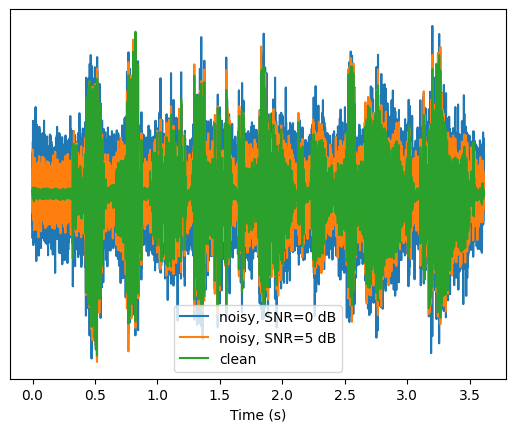

In [11]:
# Display the noisy signals (vs. the clean one)
plt.figure()
xt = torch.arange(waveform.size(1)) / sr
plt.plot(xt, speech_noisy_0dB.T, label='noisy, SNR=0 dB')
plt.plot(xt, speech_noisy_5dB.T, label='noisy, SNR=5 dB')
plt.plot(xt, waveform.T, label='clean')
plt.yticks([])
plt.xlabel("Time (s)")
plt.legend()
plt.show()

<span style="color:red"> **Exercise 3**</span>. For each SNR $\in [-5, 0, 5, 10]$ dB, add noise to the files in the dataset, perform ASR and compute/display the mean WER. What do you observe?

In [15]:
# Process a folder
def process_folder_noisy(data_speech_dir, data_transc_dir, acoustic_model, decoder, snr_dB=0, verbose=True, max_files=None):

    # Get the list of files in the dataset folder
    audio_files = find_files(data_speech_dir)

    # Take a subset of files
    nfiles = len(audio_files)
    if max_files:
        nfiles = min(nfiles, max_files)
    audio_files = audio_files[:nfiles]

    # Initialize lists containing true and estimated transcripts, as well as WER
    true_transcript_all = []
    est_transcript_all = []
    wer_all = []

    for iaf, audio_file in enumerate(audio_files):
        
        # Get files path
        audio_file_path = os.path.join(data_speech_dir, audio_file)
        transc_file_path = os.path.join(data_transc_dir, audio_file.replace('wav', 'txt'))

        # Load an audio signal
        waveform, sr = torchaudio.load(audio_file_path, channels_first=True)

        # Add noise
        waveform, _ = add_noise(waveform, snr_dB)
        
        # Apply acoustic model and decoder
        with torch.inference_mode():
            emission, _ = acoustic_model(waveform)
            est_transcript = decoder(emission)
            
        # Load the true transcription
        true_transcript = get_true_transcript(transc_file_path)
        
        # Compute WER
        wer = get_wer(true_transcript, est_transcript)
        wer_all.append(wer)

        est_transcript_all.append(est_transcript)
        true_transcript_all.append(true_transcript)
        
        # Display results
        if verbose:
            print(f"File {iaf+1} / {nfiles}")
            print('Estimated transcript: ', est_transcript)
            print('True transcript: ', true_transcript)
            print(f"WER: {wer*100} %")

    wer_mean = torch.FloatTensor(wer_all).mean()

    return wer_mean, est_transcript_all, true_transcript_all

In [28]:
acoustic_model.eval()

Wav2Vec2Model(
  (feature_extractor): FeatureExtractor(
    (conv_layers): ModuleList(
      (0): ConvLayerBlock(
        (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
      )
      (1-4): 4 x ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
      )
      (5-6): 2 x ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
      )
    )
  )
  (encoder): Encoder(
    (feature_projection): FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (pos_conv_embed): ConvolutionalPositionalEmbedding(
        (conv): ParametrizedConv1d(
          768, 768, kernel_size=(128,), stride=(1,), padding=(64,), groups=16
          (parametriza

In [31]:
# Adjust the code and perform ASR at various SNR levels
wers = []
labels = bundle.get_labels()
decoder = GreedyDecoder(labels=labels)

for snr_dB in [-5, 0, 5, 10]:
    wer_mean, _, _ = process_folder_noisy(data_speech_dir, data_transc_dir, acoustic_model, decoder, snr_dB=snr_dB, verbose=False, max_files=MAX_FILES)
    print(f"SNR level: {snr_dB} dB ---- Mean WER: {wer_mean*100:.1f} %")
    wers.append(wer_mean)

SNR level: -5 dB ---- Mean WER: 95.3 %
SNR level: 0 dB ---- Mean WER: 67.6 %
SNR level: 5 dB ---- Mean WER: 28.8 %
SNR level: 10 dB ---- Mean WER: 16.7 %


**Model / Decoder:** WAV2VEC2_ASR_BASE_100H / GreedyDecoder 
**Metric(s):** WER  
**Notes (optional):** _______________________________________________

| SNR -5 dB (WER) | SNR 0 dB (WER) | SNR 5 dB (WER) | SNR 10 dB (WER) |
|-----------------|---------------|---------------|----------------|
|        95.3     |      67.6     |     28.8      |     16.7       |

## Question:

What do we observe as the noise increases?


In [ ]:
## The lower the SNR, the higher the WER >> the worse performance of the ASR model

## Naturally, the more corrupted the audio signal is by noise, the worse the ASR results.

## Influence of the amount of training data

So far, we have used a model that was fine-tuned for ASR on 100 hours of speech, but alternative models exist in torchaudio (recall the list of pipelines is [here](https://pytorch.org/audio/stable/pipelines.html#id36)). 

<span style="color:red"> **Exercise 4**</span>. Evaluate the impact of the amount of data for fine-tuning. To that end, load models that use the same architecture (= basic wav2vec), but fine-tuned with more or loss speech data, perform ASR on the dataset, and compute the WER. What do you observe?

In [ ]:
#Evaluate the impact of the amount of data for fine-tuning. To that end, load models that use the same architecture (= basic wav2vec), but fine-tuned with more or loss speech data, perform ASR on the dataset, and compute the WER. What do you observe?

model_name=""

bundle = getattr(torchaudio.pipelines, model_name)
acoustic_model = bundle.get_model()
decoder = GreedyDecoder(labels=bundle.get_labels())
wer = process_folder(data_speech_dir, data_transc_dir, acoustic_model, decoder, verbose=False, max_files=MAX_FILES)[0]
print(f"Model: {model_name} --- WER: {wer*100:.1f} %")

In [ ]:
check_bundle = torchaudio.pipelines.WAV2VEC2_ASR_SMALL_LV60

AttributeError: module 'torchaudio.pipelines' has no attribute 'WAV2VEC2_ASR_SMALL_LV60'

In [44]:
device = torch.device("cpu")

# models_names = [
#     "WAV2VEC2_ASR_BASE_10M",
#     "WAV2VEC2_ASR_BASE_100H",
#     "WAV2VEC2_ASR_BASE_960H",
# ]

models_names = [
    torchaudio.pipelines.WAV2VEC2_ASR_BASE_10M,
    torchaudio.pipelines.WAV2VEC2_ASR_BASE_100H,
    torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H,
]

for model_name in models_names:

    device = torch.device("cpu")

    # Load model from torchaudio (it will use the cached .pth file)
    bundle = model_name
    acoustic_model = bundle.get_model().to(device)
    
    # bundle = getattr(torchaudio.pipelines, model_name)
    # acoustic_model = bundle.get_model().to(device)

    # Total parameters
    n_params = sum(p.numel() for p in acoustic_model.parameters())

    # Trainable parameters only
    # n_trainable = sum(p.numel() for p in acoustic_model.parameters() if p.requires_grad)

    acoustic_model.eval()

    decoder = GreedyDecoder(labels=bundle.get_labels())

    wer = process_folder(
        data_speech_dir,
        data_transc_dir,
        acoustic_model,
        decoder,
        verbose=False,
        max_files=MAX_FILES
    )[0]

    print(f"Model {model_name._path} WER: {wer*100:.1f} %")
    print(f"Total parameters: {n_params:,}")

Model wav2vec2_fairseq_base_ls960_asr_ll10m.pth WER: 52.3 %
Total parameters: 94,393,245
Model wav2vec2_fairseq_base_ls960_asr_ls100.pth WER: 9.5 %
Total parameters: 94,393,245
Model wav2vec2_fairseq_base_ls960_asr_ls960.pth WER: 4.3 %
Total parameters: 94,393,245


In [41]:
# Total parameters
n_params = sum(p.numel() for p in acoustic_model.parameters())

# Trainable parameters only
n_trainable = sum(p.numel() for p in acoustic_model.parameters() if p.requires_grad)
print(f"Total parameters: {n_params:,}")
print(f"Trainable parameters: {n_trainable:,}")

Total parameters: 94,393,245
Trainable parameters: 94,393,245


## Question

Experiment and fill out the table below:

| Model name | Model size / Notes | WER (%) |
|-----------:|-------------------|--------:|
|     wav2vec2_fairseq_base_ls960_asr_ll10m       |      -//-             |  52.3 %       |
|         wav2vec2_fairseq_base_ls960_asr_ls100   |    -//-               |   9.5 %       |
|       wav2vec2_fairseq_base_ls960_asr_ls960     | 94,393,245                  |    4.3 %     |

In [39]:
torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H

Wav2Vec2ASRBundle(_path='wav2vec2_fairseq_base_ls960_asr_ls960.pth', _params={'extractor_mode': 'group_norm', 'extractor_conv_layer_config': [(512, 10, 5), (512, 3, 2), (512, 3, 2), (512, 3, 2), (512, 3, 2), (512, 2, 2), (512, 2, 2)], 'extractor_conv_bias': False, 'encoder_embed_dim': 768, 'encoder_projection_dropout': 0.1, 'encoder_pos_conv_kernel': 128, 'encoder_pos_conv_groups': 16, 'encoder_num_layers': 12, 'encoder_num_heads': 12, 'encoder_attention_dropout': 0.1, 'encoder_ff_interm_features': 3072, 'encoder_ff_interm_dropout': 0.0, 'encoder_dropout': 0.1, 'encoder_layer_norm_first': False, 'encoder_layer_drop': 0.05, 'aux_num_out': 29}, _sample_rate=16000, _normalize_waveform=False, _model_type='Wav2Vec2', _labels=('|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z'), _remove_aux_axis=(1, 2, 3))

# Grading and Test Materials

The labs make up 40% of your total module grade.

This 40% is divided into two parts:
* 20% for completing the Python lab exercises
* 20% for a short hand-written test at the beginning of each lab, starting from Lab 2

In short, your lab grade is the average of your lab work and written test results, and together they contribute 40% to the final module grade.

## Coding blocks and questions that will be tested next class:

In [ ]:
## Loading your audio

import torchaudio

audio_path = ""
waveform, sample_rate = torchaudio.load(audio_path)

print(f"Waveform shape: {waveform.shape}")
print(f"Sample rate: {sample_rate}")

In [ ]:
import matplotlib.pyplot as plt

waveform, sr = torchaudio.load("")
plt.plot(waveform[0])
plt.show()

#What does 0 stand for?
#What are channels? 


In [ ]:
#iterate over files

import os

audio_dir = "/path/to/audio"

for fname in os.listdir(audio_dir)[:10]:
    print(fname)

* What is the WER formula?
* What is SNR?
* What blocks does end-to-end ASR pipeline consist of? Each responsible for what?
* What is pytorch?
* How does pytorch work?
* In your own words, easiest possible way, explain dynamic computation graph.
* Two possible ASR applications in today's world
